## Time Series Analysis with Pandas

In [21]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [23]:
# Create a Synthetic Time Series Dataset

import pandas as pd
import numpy as np

# Generate date range
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Generate random values between -5 and 5
data = np.random.uniform(-5, 5, size=len(date_rng))

# Create a pandas Series
ts = pd.Series(data, index=date_rng)
ts.name = "Random Values"

# Display first few rows
print(ts.head())

2023-01-01   -2.051490
2023-01-02    4.290104
2023-01-03   -0.226511
2023-01-04    1.040260
2023-01-05   -1.433008
Freq: D, Name: Random Values, dtype: float64


In [25]:
# Time-based Slicing

# Data for January 2023
jan_data = ts['2023-01']
print("January 2023 Data:")
print(jan_data)

# Data from March 15 to March 31, 2023
march_data = ts['2023-03-15':'2023-03-31']
print("March 15-31, 2023 Data:")
print(march_data)

January 2023 Data:
2023-01-01   -2.051490
2023-01-02    4.290104
2023-01-03   -0.226511
2023-01-04    1.040260
2023-01-05   -1.433008
2023-01-06   -0.345302
2023-01-07   -3.125748
2023-01-08   -3.894589
2023-01-09    1.809017
2023-01-10    4.173368
2023-01-11   -1.801578
2023-01-12   -0.958259
2023-01-13    4.677970
2023-01-14   -0.418016
2023-01-15   -4.726538
2023-01-16    1.669454
2023-01-17   -1.135873
2023-01-18    2.008971
2023-01-19    2.440429
2023-01-20   -0.824428
2023-01-21    0.125386
2023-01-22    1.925624
2023-01-23   -2.160167
2023-01-24   -2.638536
2023-01-25   -0.212943
2023-01-26   -0.719096
2023-01-27   -4.235112
2023-01-28    3.912052
2023-01-29   -3.732501
2023-01-30    3.807814
2023-01-31   -1.326441
Freq: D, Name: Random Values, dtype: float64
March 15-31, 2023 Data:
2023-03-15   -2.930707
2023-03-16   -2.837648
2023-03-17    0.243434
2023-03-18    1.563846
2023-03-19    3.100763
2023-03-20   -1.634258
2023-03-21    1.097406
2023-03-22   -3.743094
2023-03-23    4

In [27]:
# Resampling

# Resample to monthly mean
monthly_mean = ts.resample('M').mean()
print("Monthly Mean:")
print(monthly_mean)

# Resample to weekly sum
weekly_sum = ts.resample('W').sum()
print("Weekly Sum:")
print(weekly_sum)

Monthly Mean:
2023-01-31   -0.131796
2023-02-28   -0.572477
2023-03-31    0.264020
2023-04-30   -0.160667
2023-05-31    0.232386
2023-06-30   -0.399165
2023-07-31   -0.164393
2023-08-31    0.368767
2023-09-30    0.311491
2023-10-31   -0.002945
2023-11-30   -0.071289
2023-12-31   -0.226331
Freq: ME, Name: Random Values, dtype: float64
Weekly Sum:
2023-01-01    -2.051490
2023-01-08    -3.694794
2023-01-15     2.755965
2023-01-22     6.209562
2023-01-29    -9.786303
2023-02-05     0.174916
2023-02-12    -6.795877
2023-02-19    -8.048973
2023-02-26     0.944354
2023-03-05     0.405162
2023-03-12     0.666462
2023-03-19    -3.337932
2023-03-26     0.915816
2023-04-02    13.599673
2023-04-09     0.077734
2023-04-16    -3.326757
2023-04-23     2.788905
2023-04-30    -8.246823
2023-05-07    -1.510302
2023-05-14     3.574621
2023-05-21     3.107955
2023-05-28    -1.663914
2023-06-04     8.006381
2023-06-11     1.105647
2023-06-18    -3.585108
2023-06-25   -11.879908
2023-07-02   -11.069021
2023

Shifted Forward (1 Day):
2023-01-01         NaN
2023-01-02   -2.051490
2023-01-03    4.290104
2023-01-04   -0.226511
2023-01-05    1.040260
Freq: D, Name: Random Values, dtype: float64
Shifted Backward (1 Day):
2023-01-01    4.290104
2023-01-02   -0.226511
2023-01-03    1.040260
2023-01-04   -1.433008
2023-01-05   -0.345302
Freq: D, Name: Random Values, dtype: float64


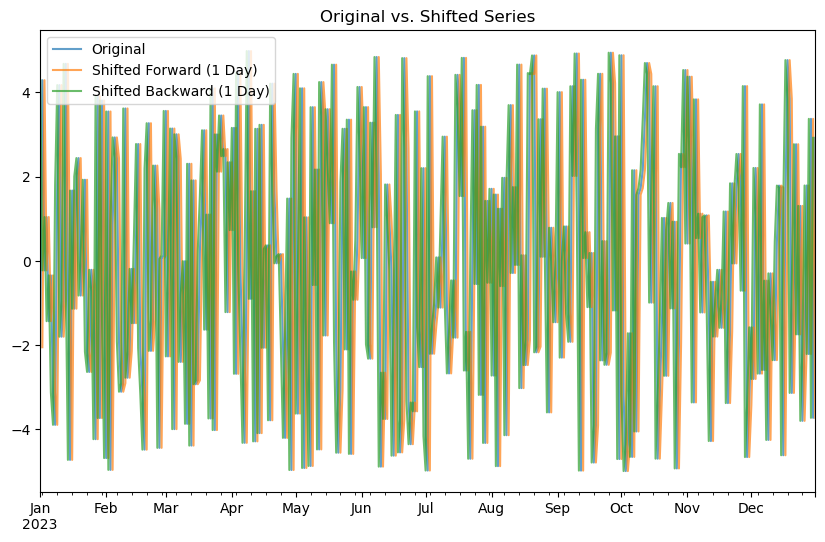

In [29]:
# Shifting

# Shift forward by 1 day
shifted_forward = ts.shift(1)
print("Shifted Forward (1 Day):")
print(shifted_forward.head())

# Shift backward by 1 day
shifted_backward = ts.shift(-1)
print("Shifted Backward (1 Day):")
print(shifted_backward.head())

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ts.plot(label='Original', alpha=0.7)
shifted_forward.plot(label='Shifted Forward (1 Day)', alpha=0.7)
shifted_backward.plot(label='Shifted Backward (1 Day)', alpha=0.7)
plt.legend()
plt.title('Original vs. Shifted Series')
plt.show()

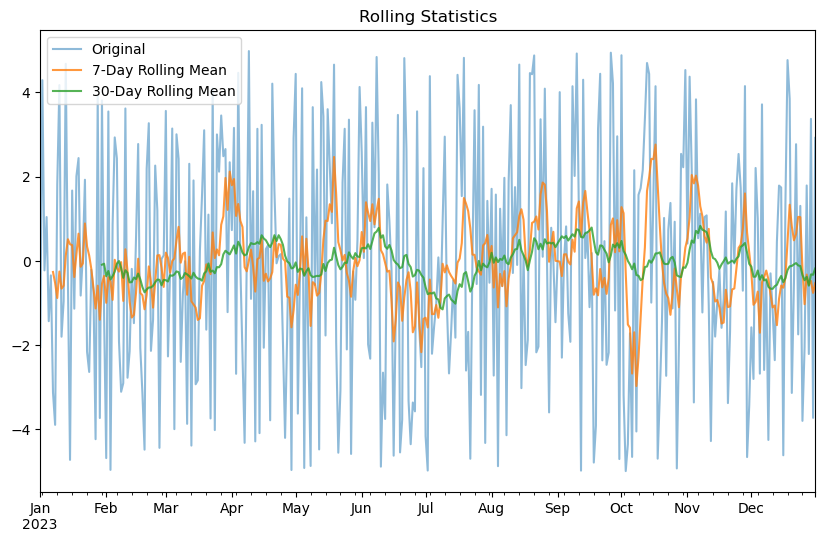

In [31]:
# Rolling Statistics

# 7-day and 30-day rolling mean
rolling_7 = ts.rolling(window=7).mean()
rolling_30 = ts.rolling(window=30).mean()

# Visualization
plt.figure(figsize=(10, 6))
ts.plot(label='Original', alpha=0.5)
rolling_7.plot(label='7-Day Rolling Mean', alpha=0.8)
rolling_30.plot(label='30-Day Rolling Mean', alpha=0.8)
plt.legend()
plt.title('Rolling Statistics')
plt.show()

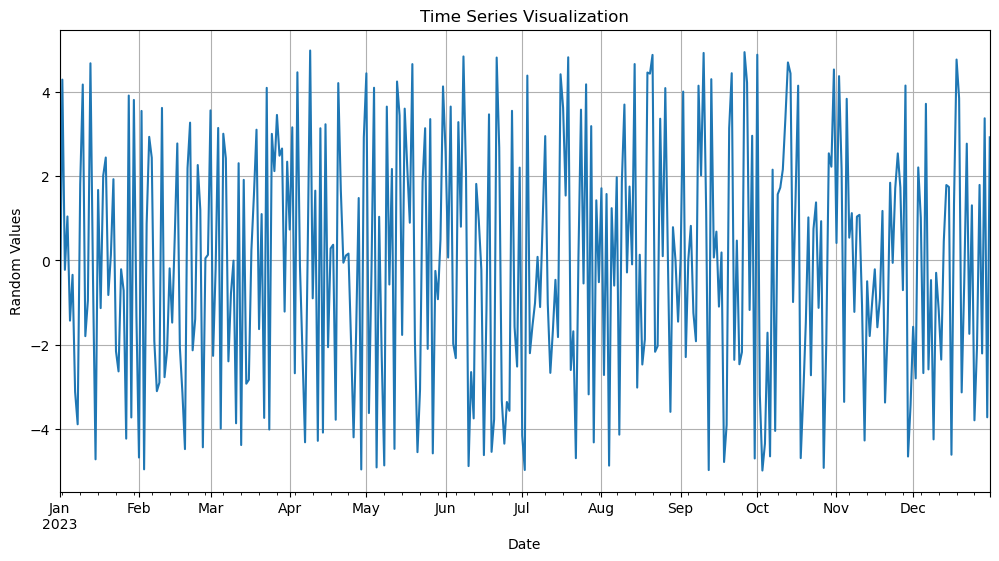

In [33]:
# Visualization

# Plot the time series
plt.figure(figsize=(12, 6))
ts.plot()
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Random Values')
plt.grid(True)
plt.show()